# Sonnenfinsternis vom 8. April 2024
Dieses Notizbuch verwendet Daten, die während der Sonnenfinsternis 2024 in Upper Sandusky, OH aufgenommen wurden, wo die Totalität fast vier Minuten lang dauerte. Während Sie durch dieses Notizbuch arbeiten, werden Sie unter anderem die folgenden Größen kennenlernen:

- Die relative Größe des Mondes und der Sonne
- Der tangentielle Geschwindigkeitsvektor des Mondes

# Teil 1 - Die Grundlagen
---
In diesem Kapitel führen wir einige grundlegende Berechnungen durch und überprüfen einige Aspekte der Himmelskinematik. Dies ist entscheidend, um die nachfolgenden Schritte vollständig zu verstehen, in denen wir tiefer in die Materie eintauchen und die entsprechenden Berechnungen zunehmend anspruchsvoller werden.

## Aufgabe 1 - Darstellung eindimensionaler Datenarrays

Beginnen wir mit dem Drucken eindimensionaler Datenserien. In diesem Beispiel plotten wir einen Kreis, der auf den Koordinatenursprung (0, 0) zentriert ist.

Eine Kreislinie kann mit folgender Parameterkurve parametrisiert werden:
$$\begin{align*}
x\left(t\right)&=\cos t \\
y\left(t\right)&=\sin t
\end{align*}$$

In diesem Fall variieren wir den freien Parameter $t$ im Bereich $[0, 2\pi[$. $t$ bestimmt den Ort eines beliebigen Punktes auf dem Kreis. Die folgende Zelle erstellt einen Datensatz, der einen Kreis mit Radius $1.0$ konstruiert.

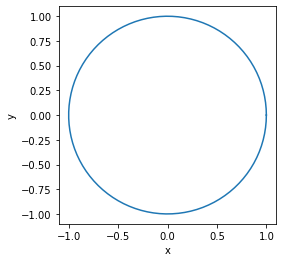

In [1]:
import numpy as np
import matplotlib.pyplot as plt
t_values = np.linspace(0., 2. * np.pi , 100) # creates a list of 100 entries varying from [0, 2pi[ (including 0, but not 2pi)

x_values = np.cos(t_values)
y_values = np.sin(t_values)
plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect(1)
plt.show()

## Aufgabe 2 - Die Ellipse
Keplers erstes Gesetz besagt, dass alle Planeten sich auf elliptischen Bahnen bewegen, wobei sich die Sonne in einem ihrer Brennpunkte befindet. Wir können damit beginnen, eine Ellipse zu zeichnen, indem wir den Code modifizieren, den wir für die Erzeugung einer kreisförmigen Trajektorie entwickelt haben. In einem streng mathematischen Sinne kann eine Ellipse auch als eine etwas "gedrückte" Kreisform betrachtet werden. Lassen Sie uns daher die Werte auf der $y$-Achse durch eine konstante Zahl (aber nicht null!) teilen. Das Ergebnis wird zwangsläufig eine Ellipse sein.

Sie können mit verschiedenen Werten für den Stauchungsfaktor experimentieren, um seine Auswirkung auf die Form zu sehen.

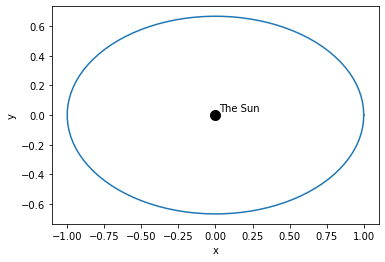

In [2]:
squish_factor = 1.5 # the factor by which the ellipse will be stretched along the y-axis.

import numpy as np
import matplotlib.pyplot as plt
t_values = np.linspace(0., 2. * np.pi , 100) # creates a list of 100 entries varying from [0, 2pi[ (including 0, but not 2pi)

x_values = np.cos(t_values)
y_values = np.sin(t_values) / squish_factor
plt.plot(x_values, y_values)

plt.scatter(0,0,s=100, c="k")
plt.text(0.025,0.025, "The Sun")

plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect(1)
plt.show()

## Aufgabe 3 - Die Kepler-Ellipse
Die soeben konstruierte Ellipse ist in gewisser Weise problematisch, da sich die Sonne **nicht** in einem der Brennpunkte der Ellipse befindet. Es existiert eine bessere Darstellung, mit der wir die elliptische Trajektorie ausdrücken können, wobei einer der beiden Brennpunkte auf den Ursprung zentriert ist. Der freie Parameter $\varepsilon$ codiert die sogenannte _Exzentrizität_ der Ellipse und quantifiziert ihre "Zusammendrückung".

$$
r\left(\varphi\right)=\frac{a}{1+\varepsilon\cos\varphi}
$$

Mit dem folgenden Code-Schnipsel sehen die Orbits für die folgenden Exzentrizitäten aus:

a) $\varepsilon = 0$

b) $0 < \varepsilon < 0.5$

c) $0.8 < \varepsilon < 1$

d) $\varepsilon \lesssim 1$

e) $\varepsilon > 1$

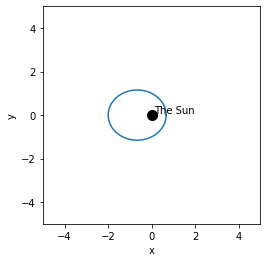

In [3]:
size = 1.
epsilon = 0.5 # the factor by which the ellipse will be stretched along the y-axis.

import numpy as np
import matplotlib.pyplot as plt
phi_values = np.linspace(0., 2. * np.pi , 1000) # creates a list of 100 entries varying from [0, 2pi[ (including 0, but not 2pi)

r_values = size / (1. + epsilon * np.cos(phi_values))
x_values = r_values * np.cos(phi_values)
y_values = r_values * np.sin(phi_values)
plt.plot(x_values, y_values)

plt.scatter(0,0,s=100, c="k")
plt.text(0.1,0.1, "The Sun")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect(1)
plt.show()

Wenn wir die Exzentrizität konstant lassen, was passiert, wenn wir die große Halbachse $a$ ändern?
In einer leicht veränderten Form hat die erzeugte Ellipse eine wohldefinierte große Halbachse:
$$
r\left(\varphi\right)=\frac{a\left(1-\varepsilon^{2}\right)}{1+\varepsilon\cos\varphi}
$$

Wie ändert sich die Trajektorie mit variierenden Werten für $a$?

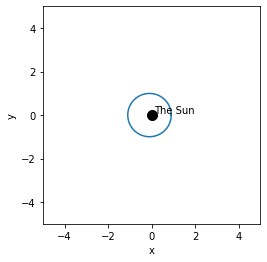

In [4]:
a = 1.
epsilon = 0.1 # the factor by which the ellipse will be stretched along the y-axis.

import numpy as np
import matplotlib.pyplot as plt
phi_values = np.linspace(0., 2. * np.pi , 1000) # creates a list of 100 entries varying from [0, 2pi[ (including 0, but not 2pi)

r_values = a * (1. - epsilon**2) / (1. + epsilon * np.cos(phi_values))
x_values = r_values * np.cos(phi_values)
y_values = r_values * np.sin(phi_values)
plt.plot(x_values, y_values)

plt.scatter(0,0,s=100, c="k")
plt.text(0.1,0.1, "The Sun")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect(1)
plt.show()

Die folgende Zelle definiert eine Funktion, mit der die vorherigen Schritte in eine prägnantere Funktion verpackt werden. Angesichts eines spezifischen Parameter-Tupels von $a$ und $\varepsilon$ generiert sie die Datenpunkte, die auf der entsprechenden Umlaufbahn liegen.

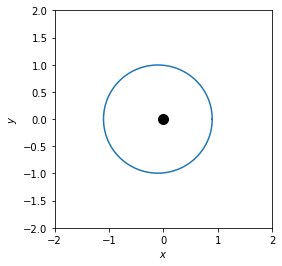

In [5]:
def ellipse(a=1., epsilon=0., rotation=0., center=[0, 0], n_points=1000):
    import numpy as np
    import matplotlib.pyplot as plt
    phi_values = np.linspace(0., 2. * np.pi , n_points) # creates a list of 100 entries varying from [0, 2pi[ (including 0, but not 2pi)

    r_values = a * (1. - epsilon**2) / (1. + epsilon * np.cos(phi_values))
    x_values = r_values * np.cos(phi_values - rotation) + center[0]
    y_values = r_values * np.sin(phi_values - rotation) + center[1]

    return x_values, y_values

# Example function call
a = 1.
epsilon = 0.1
x_data, y_data = ellipse(a, epsilon)

plt.plot(x_data, y_data)
plt.scatter(0,0,s=100, c="k")
plt.gca().set_aspect(1)
plt.xlim(-2.*a, 2.*a)
plt.ylim(-2.*a, 2.*a)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

## Aufgabe 4 - Aufbau des Sonnensystems
Nachdem wir nun wissen, wie wir eine planetarische Umlaufbahn konstruieren, können wir einen Schritt weiter gehen und unser Sonnensystem erstellen. Gehe zu https://en.wikipedia.org/wiki/List_of_gravitationally_rounded_objects_of_the_Solar_System und notiere die folgenden Zahlen für alle Planeten:

- Mittlere Entfernung von der Sonne in AE (astronomische Einheiten), die wir zuvor als die große Halbachse $a$ kennengelernt haben
- Exzentrizität (die wir früher als den Parameter $\varepsilon$ kannten)

Mit diesen Zahlen kannst du den folgenden Codeausschnitt vervollständigen, um ein Miniatur-Sonnensystem zu generieren.

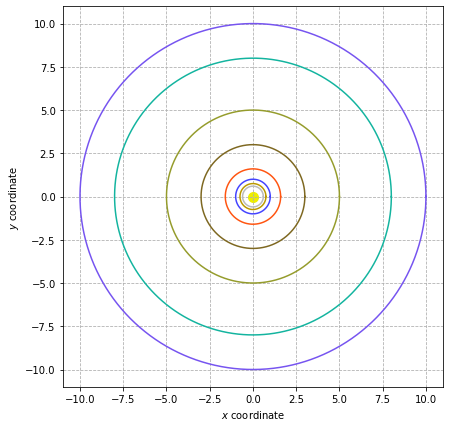

In [6]:
fig, ax = plt.subplots(figsize=(12,7))

ax.scatter(0,0, s=100, c="#eeee00") # The Sun

## Mercury ##
#############
a       = 0.6 # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#bbbbbb")

##  Venus  ##
#############
a       = 0.75 # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#bb9900")

##  Earth  ##
#############
a       = 1.0 # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#4444ff")

##  Mars   ##
#############
a       = 1.6 # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#ff5511")

## Jupiter ##
#############
a       = 3. # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#7e6821")

## Saturn  ##
#############
a       = 5. # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#959c2c")

## Uranus  ##
#############
a       = 8. # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#13b49f")

## Neptune ##
#############
a       = 10. # in AU
epsilon = 0.
#############

data = ellipse(a, epsilon)
ax.plot(*data, color="#7654f0")

################
ax.set_aspect(1)
ax.grid(ls="--")
ax.set_xlabel("$x$ coordinate")
ax.set_ylabel("$y$ coordinate")
plt.show()

## Aufgabe 5 - Die Mondbahn
Wenn du bis hierher gekommen bist, hast du nun eine Nachbildung unseres Sonnensystems in einer Näherung erster Ordnung erstellt. In der Realität sind die Dinge etwas komplizierter, da es tatsächlich 6 Parameter braucht, um die Form einer planetarischen Umlaufbahn im dreidimensionalen Raum vollständig zu beschreiben. Das vollständige Rekonstruieren unseres Sonnensystems unter Berücksichtigung all dieser Feinheiten ist jedoch nicht Gegenstand dieses Notizbuchs.

Lassen Sie uns nun die Funktion $\mathtt{ellipse}$ noch einmal verwenden, um die weit unterschiedlichen Maßstäbe in unserem Sonnensystem zu erkunden. Ein gewisses Verständnis zu gewinnen ist wichtig, da es uns hilft, die Phänomene zu verstehen, die letztendlich zu einer Sonnenfinsternis wie der am 8. April 2024 führen.

Während einer Sonnenfinsternis schneidet der Schattenkegel des Mondes die Erde und erzeugt einen mehr oder weniger kreisförmigen Schatten auf ihrer Oberfläche. Wir können nicht erwarten, bei jedem Neumond eine Sonnenfinsternis zu haben. Dies liegt daran, dass die Umlaufbahn des Mondes um etwa _5 Grad_ vertikal geneigt ist. Folglich verpasst die Erde hier und da den lunaren Schatten, und es ist keine Sonnenfinsternis auf unserem Planeten sichtbar. Um ein Gefühl für die Wahrscheinlichkeit dieses Ereignisses zu bekommen, lassen Sie uns zuerst die lunare Umlaufbahn im korrekten Maßstab zur Querschnittsfläche der Erde plotten.

In dem folgenden Diagramm ist der Durchmesser der Erde maßstabsgetreu und in Kilometern angegeben. Verwenden Sie die Funktion $\mathtt{ellipse}$, um die lunare Umlaufbahn mit den korrekten Parametern für ihre große Halbachse sowie ihre Exzentrizität zu plotten.

Darüber hinaus fügen Sie eine Umlaufbahn mit derselben großen Halbachse hinzu, aber mit $\varepsilon=0$ (d.h. eine zirkularisierte Umlaufbahn mit derselben mittleren Entfernung). Durch den Vergleich beider sehen Sie die Abweichung von der kreisförmigen Umlaufbahn.

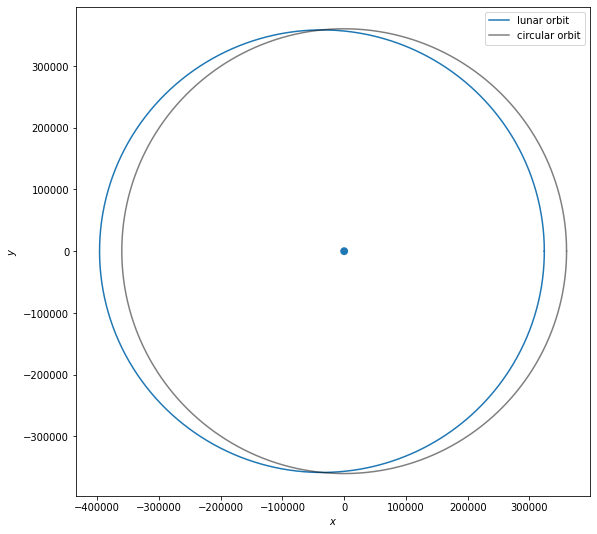

In [7]:
# Lunar Orbit
a = 360000
epsilon = 0.1
x_data, y_data = ellipse(a, epsilon)

# Comparison Circularized orbit
a_circ = 360000
epsilon_circ = 0.
x_circ, y_circ = ellipse(a_circ, epsilon_circ)

plt.figure(figsize=(12,9))
plt.plot(x_data, y_data, color="C0", label="lunar orbit")
plt.plot(x_circ, y_circ, color="k", alpha=0.5, label="circular orbit")
from matplotlib.patches import Circle
plt.gca().add_patch(Circle((0,0), 6371.))
plt.gca().set_aspect(1)
#plt.xlim(-2.*a, 2.*a)
#plt.ylim(-2.*a, 2.*a)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

# Teil 2 - Datenauswertung
---
Wie Sie vielleicht bereits bemerkt haben, ist die Umlaufbahn des Mondes signifikant exzentrisch. Daher gibt es Abschnitte auf seiner Umlaufbahn, in denen der Mond deutlich weiter von der Erde entfernt ist als an anderen Stellen. Dies führt zum Phänomen der **totalen** und **ringförmigen** Sonnenfinsternisse. Letztere treten auf, wenn der Mond während des Finsternisereignisses zufällig auf der fernen Seite seiner Umlaufbahn ist, während totale Sonnenfinsternisse von der Erde aus beobachtbar sind, wenn der Mond besonders nah ist. Am 8. April 2024 war eine totale Sonnenfinsternis in vielen Teilen der Vereinigten Staaten sichtbar. Die Totalität dauerte ungefähr bis zu 4 Minuten. Während dieses Ereignisses wurde eine Bildserie aufgenommen, die das Finsternisereignis zeigt, wie es passierte. Durch eine ordnungsgemäße Analyse der Daten kann man aus den Bildern einige interessante Zahlen ableiten. Im Rahmen dieses Notizbuchs versuchen wir jedoch nur, die orbitale Geschwindigkeit des Mondes zu berechnen, gegeben die Entfernung zum Mond.
Nachfolgend finden Sie einige Fakten zu den Bildern, mit denen Sie arbeiten:

Aufgenommene Bilder
--------------------
**IMG_1037.CR2**: 2024:04:08 20:17:20 UTC

**IMG_1369.CR2**: 2024:04:08 20:27:35 UTC

**IMG_2689.CR2**: 2024:04:08 21:11:21 UTC

**IMG_3358.CR2**: 2024:04:08 21:35:10 UTC

**IMG_3412.CR2**: 2024:04:08 21:36:59 UTC

Solarradius auf den Bildern: $\approx483\ \mathrm{Pixel}$
Scheinbarer Sonnendurchmesser während der Finsternis aus der Sicht der Erde: $31'\,56.61''$ ($\approx0.532^\circ$)

Die bevorstehenden Schritte erfordern eine gewisse geometrische Analyse. Dies ist lehrreicher mit Stift und Papier. Lassen Sie uns also zwei der Bilder drucken, nämlich _IMG_1369.CR2_ und _IMG_2689.CR2_, zusammen mit einer repräsentativen Pixel-Skala, damit wir relativ genaue Messungen durchführen können.

Die folgende Routine konvertiert die Rohdaten des Graustufenbilds in einen rot-grün-blauen (RGB) farblich codierten Plot, den wir physisch drucken können, um mit weiteren Analyse-Schritten fortzufahren.

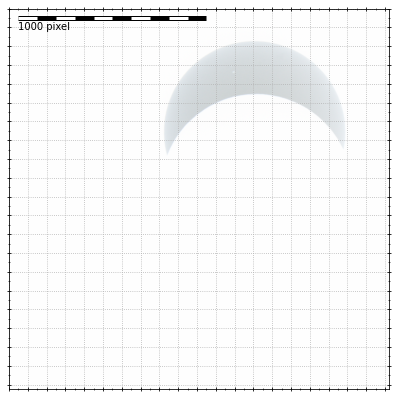

In [29]:
filename = "IMG_2689.CR2"
negative = True

import rawpy
def convert_raw_image(fname):
    """Display an rgb raw image."""
    raw_data = rawpy.imread(fname)
    rgb = raw_data.postprocess(gamma=(1,1), no_auto_bright=True, output_bps=16) / (2**16 - 1)
    return rgb

image_data = convert_raw_image(filename)

fig, ax = plt.subplots(figsize=(12,7))

crop = [2000, 1000]
if negative:
    ax.imshow(1.-image_data[crop[0]:-crop[0], crop[1]:-crop[1],:])
else:
    ax.imshow(image_data[crop[0]:-crop[0], crop[1]:-crop[1],:])
    
ax.grid(ls="dotted")
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(50))

ax.tick_params(axis="y", direction="inout", which="both", left=True, right=True)
ax.tick_params(axis="x", direction="inout", which="both", bottom=True, top=True)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.plot([50, 1000 + 50], [50 ,50], lw=5, color="k", solid_capstyle="butt")
for i, pos in enumerate(np.arange(50, 1000, 100)):
    if i % 2 == 0:
        ax.plot([pos, pos + 100], [50, 50], color="w", lw=3, solid_capstyle="butt")

ax.text(50, 70, "1000 pixel", ha="left", va="top")

fig.savefig(filename + "_converted_bw.pdf", bbox_inches="tight")
plt.show()